This notebook is a continuation of 'capstoneEDA.ipynb'

It imports the cleaned data and creates the regressor models that predict the 
lifetime adjusted gross for each movie. Each model is scored using a number of 
metrics. The best performing model, according to mean absolute percent error, 
was the created using GradientBoostingRegressor(), with a score of 30%. 
This means the model is able to predict the lifetime adjusted gross of a movie, 
on average, with an error of +/- 30%. 

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBClassifier
import itertools

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


### create a function for scoring to calculate mean absolute percent error

In [3]:
def mean_absolute_percentage_error(y_true, y_pred):
    """This function calculatues the mean absolute percent error of the model"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Importing the clean dataframe from 'capstoneEDA.ipynb'

In [4]:
final_df = pd.read_csv('capstone_df')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_name                 1000 non-null   object 
 1   movie_name_no_year         1000 non-null   object 
 2   adj_lifetime_gross         1000 non-null   float64
 3   lifetime_gross             1000 non-null   float64
 4   est_num_tickets            1000 non-null   float64
 5   mpaa_rating                1000 non-null   object 
 6   running_time               1000 non-null   object 
 7   earliest_dom_release_date  1000 non-null   object 
 8   production_companies       1000 non-null   object 
 9   movie_genre                1000 non-null   object 
 10  cast                       1000 non-null   object 
 11  director                   1000 non-null   object 
 12  writer                     1000 non-null   object 
 13  producer                   1000 non-null   object

### specify columns for train test split

In [5]:
y = final_df['adj_lifetime_gross']
X = final_df.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets', \
                   'movie_name', 'movie_name_no_year', 'mpaa_rating', \
                   'running_time', 'float_run_time', 'franchise', 'movie_genre', \
                   'earliest_dom_release_date', 'production_companies', 'cast', \
                   'director', 'writer', 'producer', 'composer', 'cinematographer', \
                   'prod_designer', 'editor'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split \
    (X, y, test_size = 0.25, random_state = 123)


### create a function that takes in the regressor model name and hyperparameter grid name and outputs scoring and optimal hyperparameters


### r2_score: computes the coefficient of determination and provides an indication of goodness of fit. Best possible score is 1. 

### mean_absolute_error: the average of all of the absolute differences between what the target predicts and what the target actually is. 

### median_absolute_error: the median of all the absolute differences between what the target predicts and what the target actually is. outliers are less relevant than the mean absolute error.

### mean_absolute_percent_error: the average of all the percent differences between what the target predicts and what the target actually is. 

In [6]:
def model_function(model_name, grid_name):
    """This function will take in the model and hyperparameter 
    grid search name, and will run and score the model"""

    grid = GridSearchCV(estimator = model_name,
                             param_grid = grid_name,
                             cv = None,
                             n_jobs = -1)

    grid.fit(X_train, y_train)

    print(grid.best_params_)


    training_preds = grid.predict(X_train)
    test_preds = grid.predict(X_test)



    print('Training R2 Score, Random Forest Regressor: ', \
          r2_score(y_train, training_preds))
    print('Test R2 Score, Random Forest Regressor: ', \
          r2_score(y_test, test_preds))
    print('Training Mean Absolute Error Score, Random Forest Regressor: ', \
          mean_absolute_error(y_train, training_preds))
    print('Test Mean Absolute Error Score, Random Forest Regressor: ', \
          mean_absolute_error(y_test, test_preds))
    print('Training Median Absolute Error Score, Gradient Boosting Regressor: ', \
          median_absolute_error(y_train, training_preds))
    print('Test Median Absolute Error Score, Gradient Boosting Regressor: ', \
          median_absolute_error(y_test, test_preds))
    print('Training Mean Absolute Percent Error, Gradient Boosting Regressor: ', \
          mean_absolute_percentage_error(y_train, training_preds))
    print('Test Mean Absolute Percent Error, Gradient Boosting Regressor: ', \
          mean_absolute_percentage_error(y_test, test_preds))


### create a function that takes in the regressor model name, and hyperparameter grid name and output a feature importance plot

In [7]:
def feature_importance(model_name, grid_name = None):    
    """This function will take in the model and hyperparameter grid 
    seach name and will plot feature importance for the model"""
    
    model_name.fit(X_train, y_train)
    model_name.feature_importances_
    n_features = X_train.shape[1]
    plt.figure(figsize = (16,18))
    plt.barh(range(n_features), model_name.feature_importances_,align = 'center', \
             color = 'orchid')
    plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 14)
    plt.xlabel('Feature Importance', fontsize = 16)
    plt.grid(zorder=0)
    plt.show()
    

### Random forests regressors are built using a large collection of training decision trees. Each tree is trained by recursively splitting data, making splits which are the most locally optimal.


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

{'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 75, 'random_state': 123}
Training R2 Score, Random Forest Regressor:  0.7394504605984529
Test R2 Score, Random Forest Regressor:  0.24446104833601834
Training Mean Absolute Error Score, Random Forest Regressor:  54851917.35742647
Test Mean Absolute Error Score, Random Forest Regressor:  97550912.55949911
Training Median Absolute Error Score, Gradient Boosting Regressor:  34705352.341041386
Test Median Absolute Error Score, Gradient Boosting Regressor:  59643631.69759838
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  19.899524159264388
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  34.1334086102291


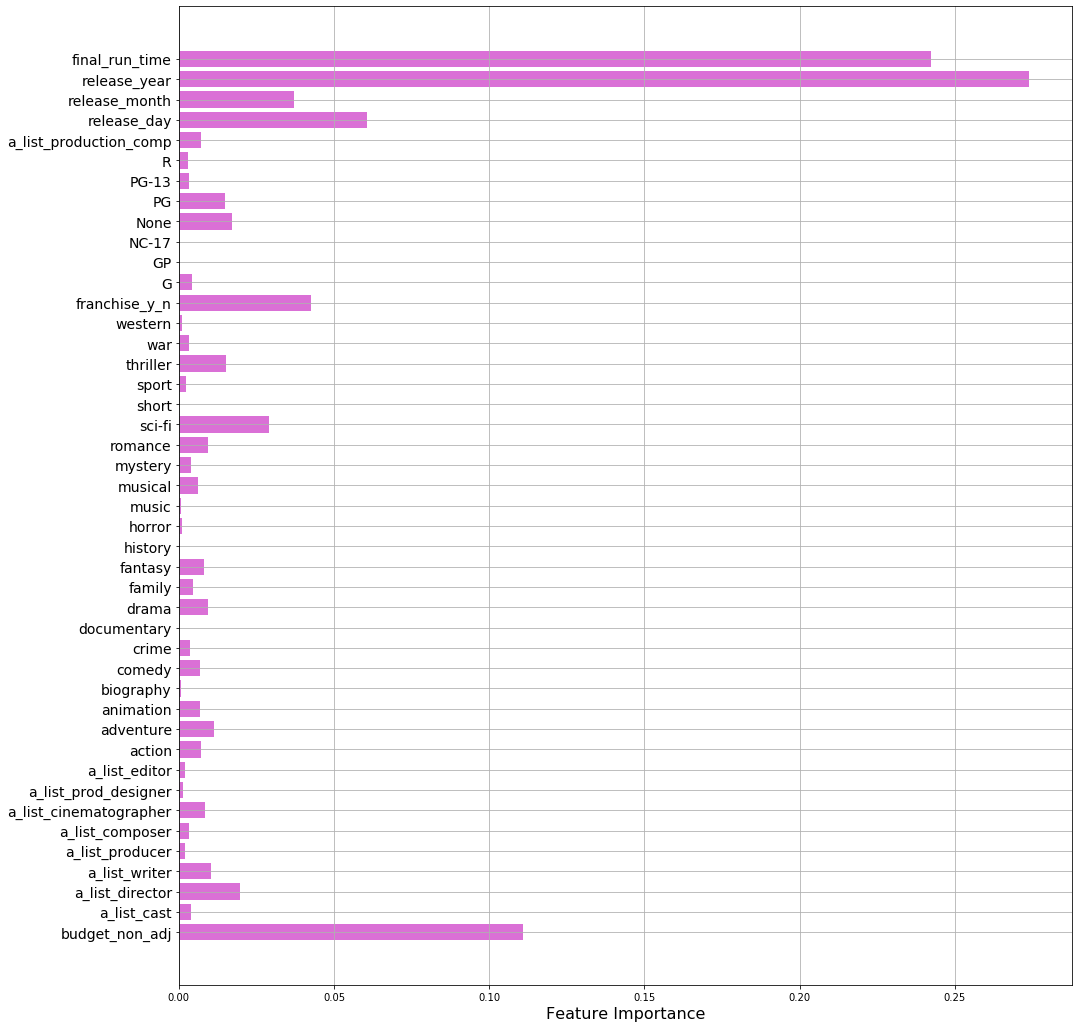

In [7]:
rfr = RandomForestRegressor()

rfr_parameters = {'n_estimators':[45, 60, 75, 90],                   
                  'max_depth': [15, 20, 25, 30],
                  'min_samples_leaf': [1, 3, 5],
                  'random_state': [123]
                 }


model_function(rfr, rfr_parameters)
feature_importance(rfr, rfr_parameters)


### Like random forest regressors,  extra trees regressors, also called extreme random forests, are built using a large collection of training decision trees. The difference is, when training aach tree by recursively splitting data, the splits are made randomly. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor

{'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 350, 'random_state': 123}
Training R2 Score, Random Forest Regressor:  0.8161188936341615
Test R2 Score, Random Forest Regressor:  0.25516302827740833
Training Mean Absolute Error Score, Random Forest Regressor:  44243886.947821036
Test Mean Absolute Error Score, Random Forest Regressor:  97311312.2120242
Training Median Absolute Error Score, Gradient Boosting Regressor:  27372782.437274173
Test Median Absolute Error Score, Gradient Boosting Regressor:  60702254.32215476
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  15.599816130757437
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  33.64315107900558


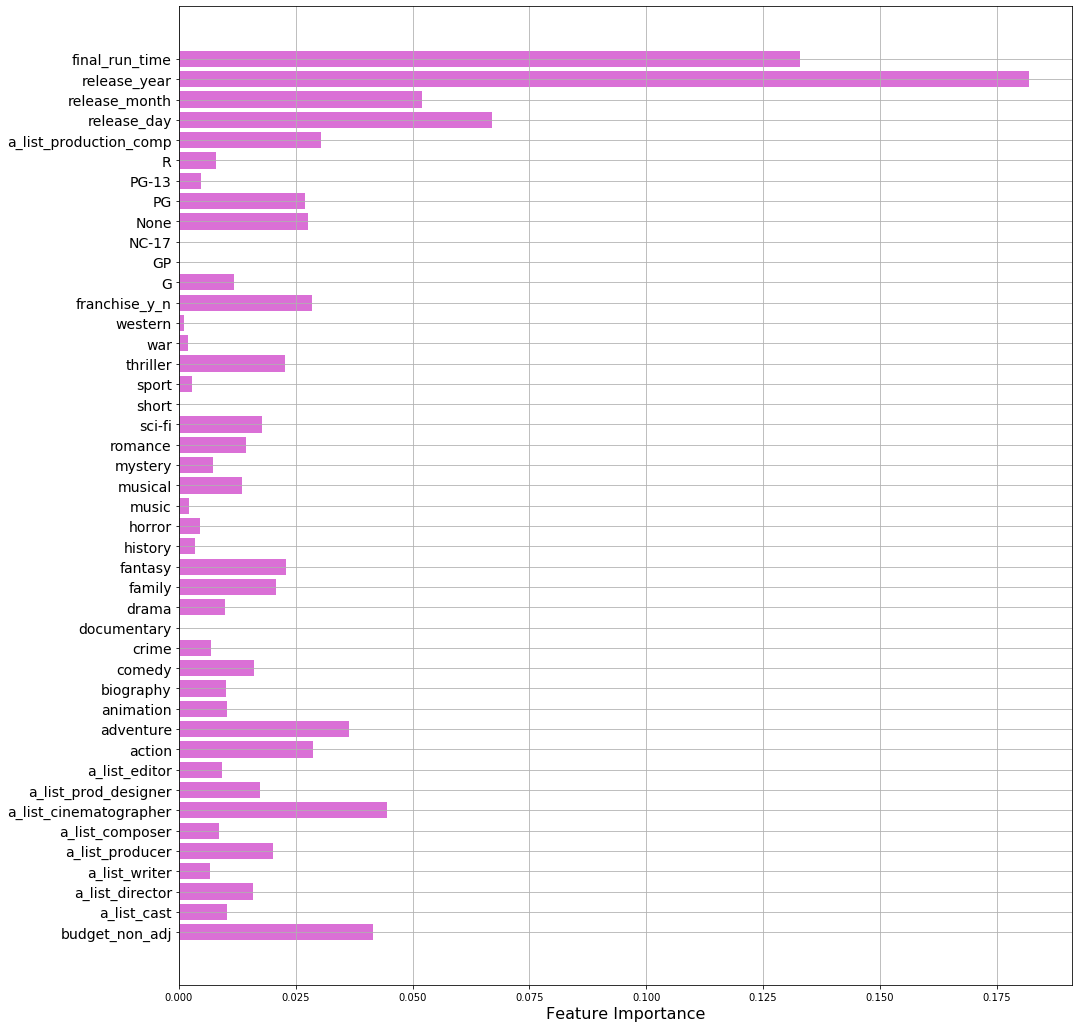

In [8]:
etr = ExtraTreesRegressor()

etr_parameters = {'n_estimators': [250, 300, 350, 400],                   
                  'max_depth': [5, 10, 15, 20],
                  'min_samples_leaf': [1, 3, 5],
                  'random_state': [123]
                 }


model_function(etr, etr_parameters)
feature_importance(etr, etr_parameters)


### Gradient boosting regressors use decision trees as their weak learner, both small decision stumps (single splits) and larger trees. It choses optimal splits when contructing their deicison trees. Trees are added only when reducing loss, using a gradient descent procedure. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

{'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 90, 'random_state': 123}
Training R2 Score, Random Forest Regressor:  0.669891024717903
Test R2 Score, Random Forest Regressor:  0.2605568510707905
Training Mean Absolute Error Score, Random Forest Regressor:  71077420.27827933
Test Mean Absolute Error Score, Random Forest Regressor:  97151063.03314944
Training Median Absolute Error Score, Gradient Boosting Regressor:  52705402.199913114
Test Median Absolute Error Score, Gradient Boosting Regressor:  61183852.94940616
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  27.183324097424183
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  32.87205046397722


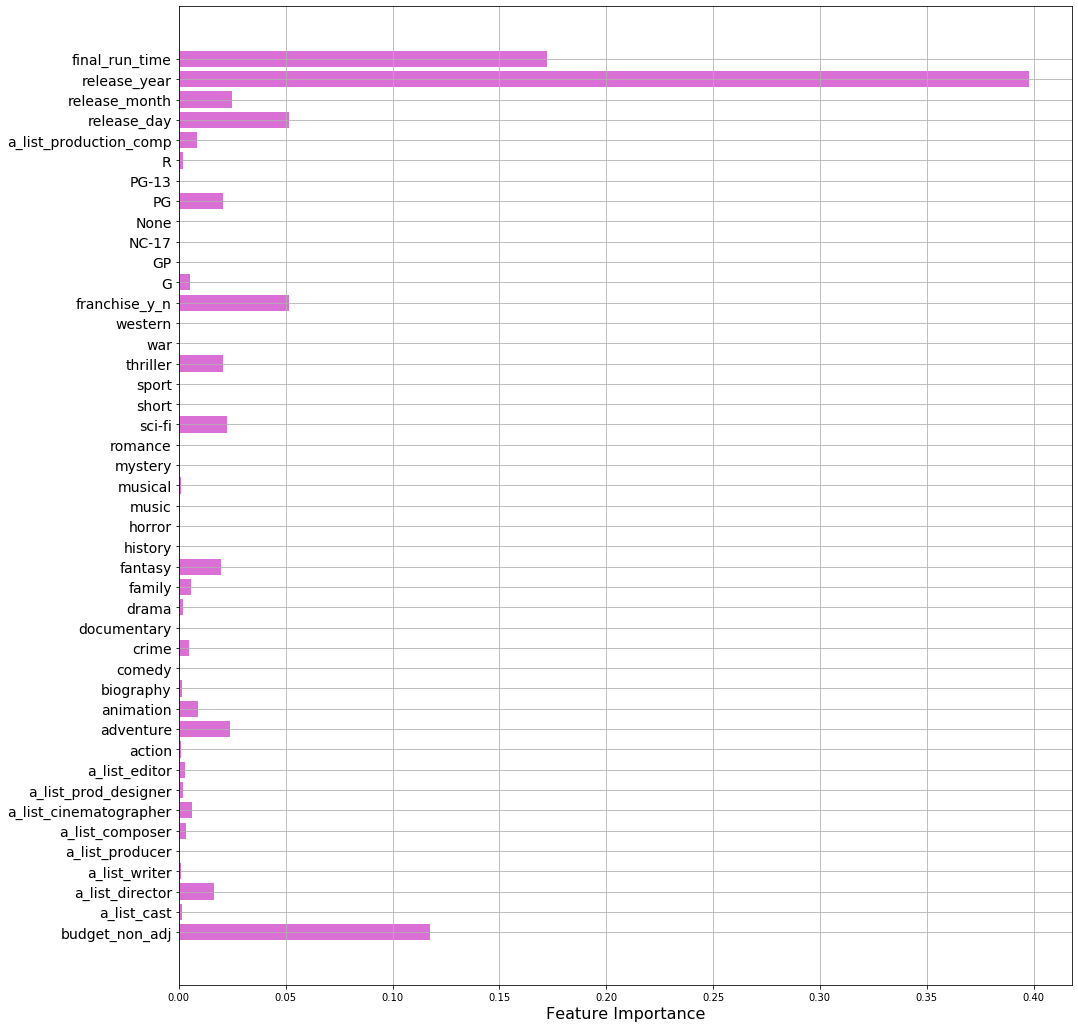

In [8]:
gbr = GradientBoostingRegressor()

gbr_parameters = {'n_estimators':[85, 90, 95],                   
                  'max_depth': [1, 3, 5, 7],
                  'min_samples_leaf': [1, 3, 5, 7],
                  'random_state': [123]
                 }

model_function(gbr, gbr_parameters)
feature_importance(gbr, gbr_parameters)


### AdaBoostRegressor, or adaptive boosting regresors, are made from single split decision trees, a weak learner. It then weights the distributions, putting more weight  on the more difficult instances. More weak learners are added to these more difficult instances. Predictions are made by majority votes of the weak learners, each weighted by their accuracy. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor

{'learning_rate': 0.025, 'n_estimators': 10, 'random_state': 123}
Training R2 Score, Random Forest Regressor:  0.3932839268220123
Test R2 Score, Random Forest Regressor:  0.22859345658370556
Training Mean Absolute Error Score, Random Forest Regressor:  93500036.8632603
Test Mean Absolute Error Score, Random Forest Regressor:  96122398.476279
Training Median Absolute Error Score, Gradient Boosting Regressor:  69425146.62200001
Test Median Absolute Error Score, Gradient Boosting Regressor:  65676371.410666674
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  34.112050969851055
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  31.77891492434047


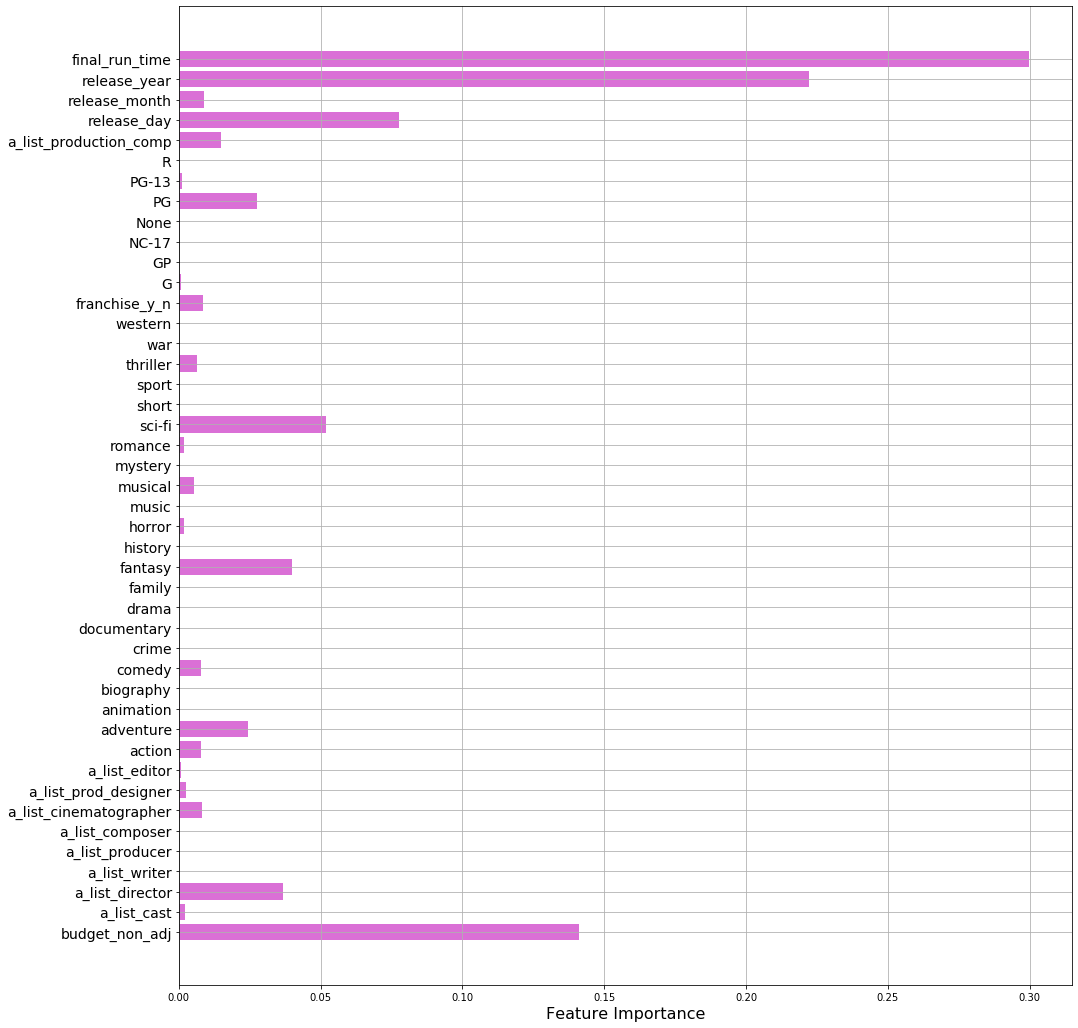

In [11]:
abr = AdaBoostRegressor()

abr_parameters = {'n_estimators':[10, 15, 20],                   
                  'learning_rate': [0.020, 0.025, 0.030],
                  'random_state': [123]
                 }

model_function(abr, abr_parameters)
feature_importance(abr, abr_parameters)


### LinearRegression containing more than two features is considered multivariate linear regresson. It finds the most optimal coefficients for all the features. It fits multiple hyperplanes on the data points and choses the the one with the lowest error. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
lr = LinearRegression()
lr_parameters = {}

model_function(lr, lr_parameters)


{}
Training R2 Score, Random Forest Regressor:  0.3629118629267053
Test R2 Score, Random Forest Regressor:  0.32177114145110264
Training Mean Absolute Error Score, Random Forest Regressor:  97491574.71933725
Test Mean Absolute Error Score, Random Forest Regressor:  102142335.74791154
Training Median Absolute Error Score, Gradient Boosting Regressor:  73431921.04045677
Test Median Absolute Error Score, Gradient Boosting Regressor:  77234098.6863594
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  37.664379046602505
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  37.81264762637577


### The GradientBoostingRegressor returned the lowest mean absolute percent error. To attempt to improve the model even further, more features are going to be added to the model based on the high feature importance of the existing column, franchise_y_n, which simply indicated whether the movie is part of a franchise or not. The added features will include the top 20 grossing franchises, and the rows will indicate whether that particular movie is part of that particular franchise or not. 

### Adding these additional 20 franchise predictors improved the performance of the model by 1%. 


In [9]:
franchise_df = final_df.copy()
grouped_franchise_df = franchise_df.groupby('franchise')['adj_lifetime_gross'].sum() \
    .sort_values(ascending = False).to_frame().reset_index().head(21)

top_20_franchise = list(grouped_franchise_df['franchise'])
top_20_franchise.remove('None')

for i in top_20_franchise:
    x = franchise_df['franchise'] == i
    franchise_df.loc[x, i] = 1
    franchise_df.loc[~x, i] = 0

franchise_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 84 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   movie_name                       1000 non-null   object 
 1   movie_name_no_year               1000 non-null   object 
 2   adj_lifetime_gross               1000 non-null   float64
 3   lifetime_gross                   1000 non-null   float64
 4   est_num_tickets                  1000 non-null   float64
 5   mpaa_rating                      1000 non-null   object 
 6   running_time                     1000 non-null   object 
 7   earliest_dom_release_date        1000 non-null   object 
 8   production_companies             1000 non-null   object 
 9   movie_genre                      1000 non-null   object 
 10  cast                             1000 non-null   object 
 11  director                         1000 non-null   object 
 12  writer               

In [10]:
y = franchise_df['adj_lifetime_gross']
X = franchise_df.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets',\
                       'movie_name', 'movie_name_no_year', 'mpaa_rating', \
                       'running_time', 'float_run_time', 'franchise', 'movie_genre',\
                       'earliest_dom_release_date', 'production_companies', 'cast', \
                       'director', 'writer', 'producer', 'composer', 'cinematographer',\
                       'prod_designer', 'editor'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split \
    (X, y, test_size = 0.25, random_state = 123)


{'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 70, 'random_state': 123}
Training R2 Score, Random Forest Regressor:  0.675469250677424
Test R2 Score, Random Forest Regressor:  0.3146226101319862
Training Mean Absolute Error Score, Random Forest Regressor:  72748517.51850578
Test Mean Absolute Error Score, Random Forest Regressor:  91886986.94411153
Training Median Absolute Error Score, Gradient Boosting Regressor:  55284763.9058609
Test Median Absolute Error Score, Gradient Boosting Regressor:  58152416.14460008
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  28.21652166282537
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  31.292580591402498


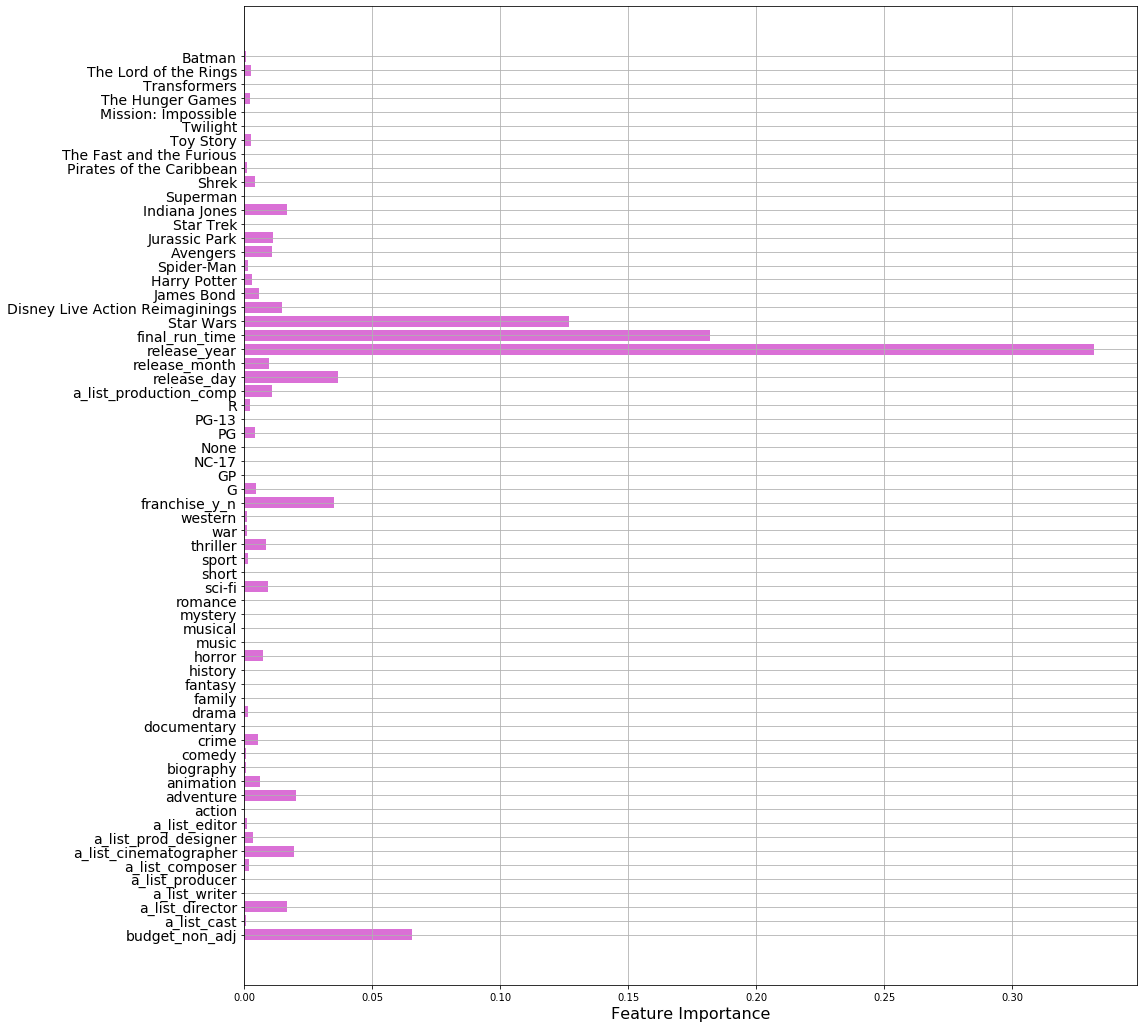

In [11]:
gbr = GradientBoostingRegressor()

gbr_parameters = {'n_estimators':[70, 80, 90],                   
                  'max_depth': [1, 3, 5, 7],
                  'min_samples_leaf': [1, 3, 5],
                  'random_state': [123]
                 }

model_function(gbr, gbr_parameters)
feature_importance(gbr, gbr_parameters)



### Live Demo:

### Using this model, the lifetime adjusted gross of a chosen movie will be predicted and the absolute percent error calculated. 

### Examples to run: 

Harry Potter and the Sorcerer's Stone

Harry Potter and the Chamber of Secrets

Harry Potter and the Prisoner of Azkaban

Harry Potter and the Goblet of Fire

Harry Potter and the Order of the Phoenix

Harry Potter and the Half-Blood Prince

Harry Potter and the Deathly Hallows: Part 1

Harry Potter and the Deathly Hallows: Part 2



In [12]:
y = franchise_df.loc[franchise_df['movie_name_no_year'] == \
                     "Harry Potter and the Half-Blood Prince", \
                     'adj_lifetime_gross']

x = franchise_df.loc[franchise_df['movie_name_no_year'] == \
                     "Harry Potter and the Half-Blood Prince"]

X = x.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets', \
            'movie_name', 'movie_name_no_year', 'mpaa_rating', 'running_time', \
            'float_run_time', 'franchise', 'movie_genre', 'earliest_dom_release_date', \
            'production_companies', 'cast', 'director', 'writer', 'producer', \
            'composer', 'cinematographer', 'prod_designer', 'editor'], axis = 1)

predict = gbr.predict(X)
print('Actual Gross: $', float(y.values))
print('Prediction Gross: $', round(float(predict), 2))
print('Absolute Percent Error: ', round(mean_absolute_percentage_error(y, predict), 2), '%')


Actual Gross: $ 381195025.0
Prediction Gross: $ 511387964.42
Absolute Percent Error:  34.15 %


### Below, the model was attempted to be improved even further by adding more features describing the production company of the movies, similar to that completed above with franchises. This did not improve the model, and resulted instead in overfitting the model. 

In [ ]:
# prod_comp_df = franchise_df.copy()
# grouped_prod_comp_df = prod_comp_df.groupby('production_companies') \
#     ['adj_lifetime_gross'].sum().sort_values(ascending = False).to_frame().reset_index().head(15)
# grouped_prod_comp_df


In [ ]:
# top_15_prod_comp = list(grouped_prod_comp_df['production_companies'])

# for i in top_15_prod_comp:
#     x = prod_comp_df['production_companies'] == i
#     prod_comp_df.loc[x, i] = 1
#     prod_comp_df.loc[~x, i] = 0
    
# prod_comp_df.info()

In [ ]:
# y = prod_comp_df['adj_lifetime_gross']
# X = prod_comp_df.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets', \
#                        'movie_name', 'movie_name_no_year', 'mpaa_rating', \
#                        'running_time', 'float_run_time', 'franchise', 'movie_genre', \
#                        'earliest_dom_release_date', 'production_companies', 'cast', \
#                        'director', 'writer', 'producer', 'composer', 'cinematographer', \
#                        'prod_designer', 'editor'], axis = 1)

# X_train, X_test, y_train, y_test = train_test_split \
#     (X, y, test_size = 0.25, random_state = 123)



In [ ]:
# gbr = GradientBoostingRegressor()

# gbr_parameters = {'n_estimators':[70, 75, 80, 85],                   
#                   'max_depth': [1, 3, 5, 7],
#                   'min_samples_split': [3, 5, 7, 9],
#                   'min_samples_leaf': [1, 3, 5, 7],
#                   'random_state': [123]
#                  }

# model_function(gbr, gbr_parameters)
# feature_importance(gbr, gbr_parameters)

